In [95]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from esda.moran import Moran
from esda.geary import Geary
from esda.getisord import G, G_Local
from pysal.lib import weights
from splot.esda import moran_scatterplot
from libpysal.weights import DistanceBand
from libpysal.weights import KNN

Julia Pawluś, Kamil Sarzyniak, Piotr Stawarski
- Projekt 2 z przedmiotu Ekonometrii Przestrzennej

In [96]:
woj = pd.read_csv("przestepstwa.csv")
pow = pd.read_csv("przestepstwa_pow.csv")
#woj_map = "wojewodztwa.shp"
pow_map = "powiaty.shp"
#woj_m = gpd.read_file(woj_map)
pow_m = gpd.read_file(pow_map)

In [97]:
woj

,oid,kod KTS,województwo,powierzchnia,rok,TERYT,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
0,1,11200000000,małopolskie,15183.0,2020,12,69174.0
1,2,12400000000,śląskie,12333.0,2020,24,117632.0
2,3,20800000000,lubuskie,13988.0,2020,8,24531.0
3,4,23000000000,wielkopolskie,29826.0,2020,30,58900.0
4,5,23200000000,zachodniopomorskie,22905.0,2020,32,35325.0
5,6,30200000000,dolnośląskie,19947.0,2020,2,74802.0
6,7,31600000000,opolskie,9412.0,2020,16,15710.0
7,8,40400000000,kujawsko-pomorskie,17971.0,2020,4,37172.0
8,9,42200000000,pomorskie,18323.0,2020,22,49381.0
9,10,42800000000,warmińsko-mazurskie,24173.0,2020,28,26295.0


In [98]:
woj.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT'], axis=1, inplace=True)
woj.rename(columns={'województwo': 'JPT_NAZWA_'}, inplace=True)
woj

,JPT_NAZWA_,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
0,małopolskie,69174.0
1,śląskie,117632.0
2,lubuskie,24531.0
3,wielkopolskie,58900.0
4,zachodniopomorskie,35325.0
5,dolnośląskie,74802.0
6,opolskie,15710.0
7,kujawsko-pomorskie,37172.0
8,pomorskie,49381.0
9,warmińsko-mazurskie,26295.0


In [99]:
woj.describe()

,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
count,16.000000
mean,47838.000000
std,31133.054732
min,15710.000000
25%,25854.000000
50%,36248.500000
75%,61468.500000
max,117632.000000


In [100]:
woj.dtypes

JPT_NAZWA_                                                                                                                                                 object
Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem    float64
dtype: object

In [101]:
pow

,oid,kod KTS,powiat,powierzchnia,rok,TERYT,Typ powiatu,TERYT województwa,Województwo,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem
0,7,11212210000,nowosądecki,1549.0,2020,1210,powiat,12,małopolskie,11958.0
1,2,11212416000,tarnowski,1412.0,2020,1216,powiat,12,małopolskie,2860.0
2,5,20811301000,gorzowski,1214.0,2020,801,powiat,8,lubuskie,1108.0
3,40,23015810000,koniński,1578.0,2020,3010,powiat,30,wielkopolskie,1163.0
4,13,23016121000,poznański,1900.0,2020,3021,powiat,30,wielkopolskie,5260.0
...,...,...,...,...,...,...,...,...,...,...
375,39,71427126000,siedlecki,1603.0,2020,1426,powiat,14,mazowieckie,766.0
376,377,71427129000,sokołowski,1131.0,2020,1429,powiat,14,mazowieckie,919.0
377,378,71427133000,węgrowski,1221.0,2020,1433,powiat,14,mazowieckie,807.0
378,379,71427328000,sochaczewski,735.0,2020,1428,powiat,14,mazowieckie,1419.0


In [102]:
pow.drop(['oid', 'kod KTS', 'Województwo', 'powierzchnia', 'rok', 'TERYT', 'Typ powiatu', 'TERYT województwa'], axis=1, inplace=True)
pow.rename(columns={'powiat': 'JPT_NAZWA_'}, inplace=True)
pow.rename(columns={
    'Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem': 'Przestępstwa_powiaty'
}, inplace=True)
pow

,JPT_NAZWA_,Przestępstwa_powiaty
0,nowosądecki,11958.0
1,tarnowski,2860.0
2,gorzowski,1108.0
3,koniński,1163.0
4,poznański,5260.0
...,...,...
375,siedlecki,766.0
376,sokołowski,919.0
377,węgrowski,807.0
378,sochaczewski,1419.0


In [103]:
pow.describe()

,Przestępstwa_powiaty
count,380.000000
mean,2014.231579
std,3182.327268
min,239.000000
25%,839.500000
50%,1271.500000
75%,2014.500000
max,45754.000000


<Axes: >

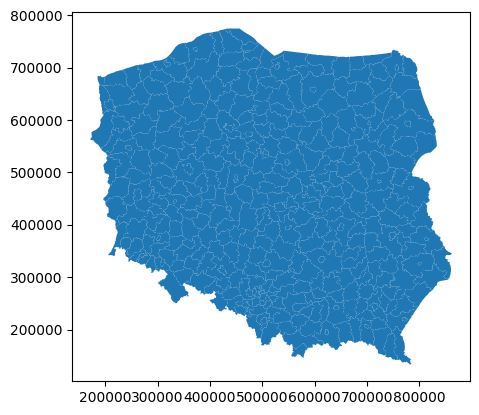

In [104]:
pow_m.plot(legend=True)

In [105]:
pow_m.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,...,1359583,0,None,0,0,3.11205337354,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21..."
1,None,POW,141297,2804,powiat elbląski,None,13422,20210514,0,20120926,...,1360107,0,None,0,0,4.2521309989,.19417975633,17074769000000,powiat,"POLYGON ((551842.165 693417.652, 551870.912 69..."
2,None,POW,209827,1415,powiat ostrołęcki,None,13409,20210518,0,20120926,...,1360143,0,None,0,0,5.31641009622,.28125317026,55066883500000,powiat,"POLYGON ((646230.458 617154.258, 646336.602 61..."
3,None,POW,79097,0413,powiat sępoleński,None,13424,20220112,0,20120926,...,1362180,0,None,0,0,2.00313300009,.10690160786,09235092600000,powiat,"POLYGON ((384997.245 615178.269, 385170.687 61..."
4,None,POW,126576,3019,powiat pilski,None,13417,20220112,0,20120926,...,1362184,0,None,0,0,4.17134504707,.17008216429,57079948000000,powiat,"POLYGON ((342585.53 579834.38, 342632.859 5798..."


In [106]:
pow_m['JPT_NAZWA_'] = pow_m['JPT_NAZWA_'].str.replace('powiat ', '', regex=False)

In [107]:
file_path = 'ludnosc.csv'


df = pd.read_csv(file_path)
df.columns = df.columns.str.strip() 


ludnosc_pow = pd.DataFrame({
    'JPT_NAZWA_': df['Powiaty'],
    'Ludnosc_powiaty': df['Ludnosc']
})


print(ludnosc_pow)

            JPT_NAZWA_  Ludnosc_powiaty
0        bolesławiecki            90103
1       dzierżoniowski           100813
2            głogowski            89102
3             górowski            34870
4             jaworski            50116
..                 ...              ...
375         świdwiński            46724
376            wałecki            53039
377           Koszalin           107048
378           Szczecin           401907
379        Świnoujście            40888

[380 rows x 2 columns]


In [108]:
print(pow)

       JPT_NAZWA_  Przestępstwa_powiaty
0     nowosądecki               11958.0
1       tarnowski                2860.0
2       gorzowski                1108.0
3        koniński                1163.0
4       poznański                5260.0
..            ...                   ...
375     siedlecki                 766.0
376    sokołowski                 919.0
377     węgrowski                 807.0
378  sochaczewski                1419.0
379   żyrardowski                1603.0

[380 rows x 2 columns]


In [109]:
pow['JPT_NAZWA_'] = pow['JPT_NAZWA_'].str.strip()
ludnosc_pow['JPT_NAZWA_'] = ludnosc_pow['JPT_NAZWA_'].str.strip()

In [110]:
merged_df = pow.merge(ludnosc_pow, on='JPT_NAZWA_')

In [111]:
merged_df['Przestępstwa_średnia_powiaty'] = (merged_df['Przestępstwa_powiaty'] / merged_df['Ludnosc_powiaty'])

In [112]:
print(merged_df[['JPT_NAZWA_', 'Przestępstwa_powiaty', 'Ludnosc_powiaty', 'Przestępstwa_średnia_powiaty']])

       JPT_NAZWA_  Przestępstwa_powiaty  Ludnosc_powiaty  \
0     nowosądecki               11958.0           216796   
1       tarnowski                2860.0           201497   
2       gorzowski                1108.0            71836   
3        koniński                1163.0           130053   
4       poznański                5260.0           399272   
..            ...                   ...              ...   
395     siedlecki                 766.0            81362   
396    sokołowski                 919.0            53804   
397     węgrowski                 807.0            65822   
398  sochaczewski                1419.0            85045   
399   żyrardowski                1603.0            75749   

     Przestępstwa_średnia_powiaty  
0                        0.055158  
1                        0.014194  
2                        0.015424  
3                        0.008943  
4                        0.013174  
..                            ...  
395                      0.

In [113]:
pow = merged_df[['JPT_NAZWA_', 'Przestępstwa_średnia_powiaty']]
print(pow)

       JPT_NAZWA_  Przestępstwa_średnia_powiaty
0     nowosądecki                      0.055158
1       tarnowski                      0.014194
2       gorzowski                      0.015424
3        koniński                      0.008943
4       poznański                      0.013174
..            ...                           ...
395     siedlecki                      0.009415
396    sokołowski                      0.017081
397     węgrowski                      0.012260
398  sochaczewski                      0.016685
399   żyrardowski                      0.021162

[400 rows x 2 columns]


In [114]:
print(pow.sort_values(by='Przestępstwa_średnia_powiaty', ascending=False))

          JPT_NAZWA_  Przestępstwa_średnia_powiaty
42            Krosno                      0.182498
15   Piekary Śląskie                      0.150790
37       Ruda Śląska                      0.091868
229          gdański                      0.055558
0        nowosądecki                      0.055158
..               ...                           ...
332        przemyski                      0.007183
338      strzyżowski                      0.006646
320          opolski                      0.006401
313        świdnicki                      0.004964
348          bielski                      0.003832

[400 rows x 2 columns]


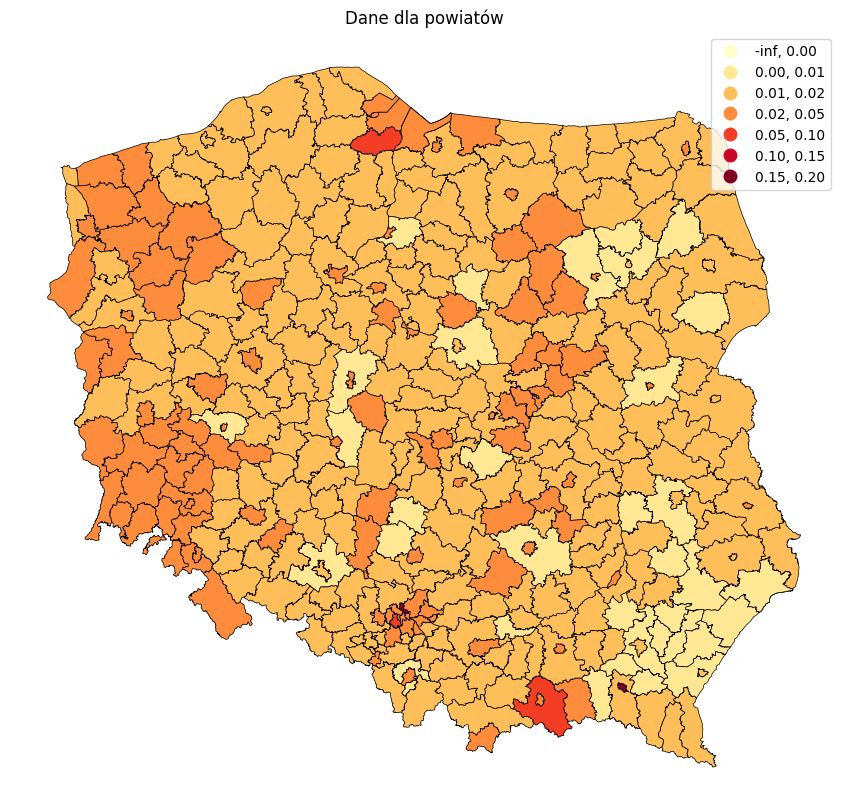

In [115]:
merged_pow = pow_m.merge(pow, on='JPT_NAZWA_')


bins = [0, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2]  # Przedziały wartości

# Dodanie kolumny z kategoryzacją danych
merged_pow['Kategoria'] = np.digitize(
    merged_pow['Przestępstwa_średnia_powiaty'], bins
)

# Tworzenie mapy z nową skalą
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_pow.plot(
    column='Przestępstwa_średnia_powiaty',
    cmap='YlOrRd',  # Paleta kolorów
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    scheme='UserDefined',  # Użycie własnych przedziałów
    classification_kwds={'bins': bins},  # Określenie przedziałów
    ax=ax
)
ax.set_axis_off()
plt.title('Dane dla powiatów')
plt.show()

In [143]:
#Analiza przy użyciu binarnej macierzy sąsiedztwa 

In [117]:
data_column = 'Przestępstwa_średnia_powiaty'

w = weights.Queen.from_dataframe(merged_pow)
w.transform = 'r'

C:\Users\xjulc\AppData\Local\Temp\ipykernel_18424\401519068.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(merged_pow)


('WARNING: ', 254, ' is an island (no neighbors)')


c:\Python310\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 254.
  W.__init__(self, neighbors, ids=ids, **kw)


In [118]:
y = merged_pow[data_column]
moran_pow = Moran(y, w)
print("Moran's I:", moran_pow.I)           # Wartość statystyki Moran's I
print("E(I):", moran_pow.EI)               # Wartość oczekiwana E(I)
print("Var(I):", moran_pow.VI_norm)         # Wariancja Var(I)
print("Z(I):", moran_pow.z_norm)            # Statystyka Z(I)
print("p-value:", moran_pow.p_norm)         # Wartość p

Moran's I: 0.09657896342641319
E(I): -0.00228310502283105
Var(I): 0.0008340830568668548
Z(I): 3.423143009567179
p-value: 0.0006190150114729597


In [119]:
geary_pow = Geary(y, w)
print("Geary's C:", geary_pow.C)           
print("E(C):", geary_pow.EC)              
print("Var(C):", geary_pow.VC_norm)            
print("Z(C):", geary_pow.z_norm)               
print("p-value:", geary_pow.p_norm)         

Geary's C: 0.8083744371413427
E(C): 1.0
Var(C): 0.0011348124581800488
Z(C): -5.688416612280592
p-value: 6.411134867236472e-09


In [120]:
g_pow = G(y, w)
print("G:", g_pow.G)                      
print("E(G):", g_pow.EG)                   
print("Var(G):", g_pow.VG)                
print("Z(G):", g_pow.z_norm)                
print("p-value:", g_pow.p_norm)              

G: 0.014666884462192097
E(G): 0.015342049697839632
Var(G): 2.4216084391163735e-07
Z(G): -1.3720126373469819
p-value: 0.08502975189135054


In [121]:
g_local_pow = G_Local(y, w)
print("Local G* values:", g_local_pow.Zs)

Local G* values: [ 1.06521565e+00  1.19051065e+00  1.12158673e+00  1.21858534e+00
  1.71063419e-01  6.48100462e-02 -2.82822446e-01 -1.75424779e-01
 -1.09378469e-01 -2.65889905e-01 -5.69253367e-02 -1.35745100e-02
 -9.28120828e-03  2.14579445e-01 -3.60020387e-01  1.19786036e-01
  7.60267848e-01  1.06264510e-01  2.31703636e-01  1.62984813e-01
  2.59500713e-01 -3.12814151e-01  9.29563571e-03 -1.34565892e-01
 -2.51894079e-01 -5.51894694e-01 -3.85926147e-01  4.85992725e-02
 -8.90457260e-01 -3.05195689e-01 -3.69085337e-01  1.74821434e-01
 -2.26947690e-02 -1.23606095e-01 -1.79967691e-01 -5.38816872e-01
 -1.81342091e-01 -1.30879756e-01 -4.88833063e-02 -2.60469237e-01
  6.18359334e-02  3.20917754e+00 -2.19620944e-01  2.68027364e+00
  5.61504096e-01  1.60897742e-01 -2.30399167e-02  4.98607541e-01
 -2.81565505e-01 -2.29322744e-01 -3.10859651e-01 -1.30756034e-01
 -2.32288989e-01 -5.96360375e-01 -1.30634245e-01 -1.47405769e-01
  2.33781455e-01 -7.58831711e-01 -4.44366655e-01 -8.76847236e-01
 -2.7552

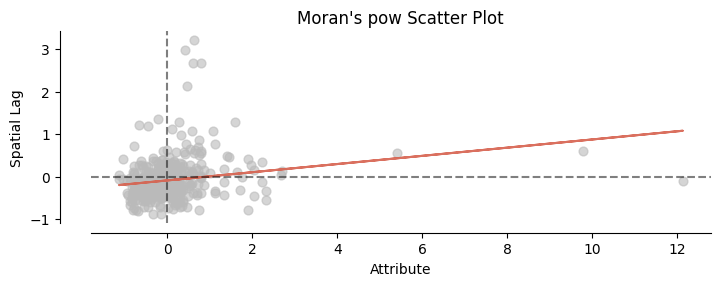

In [122]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

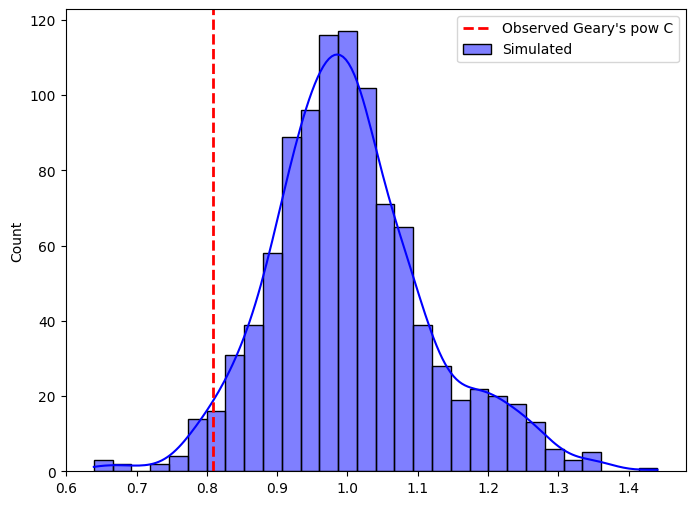

In [123]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

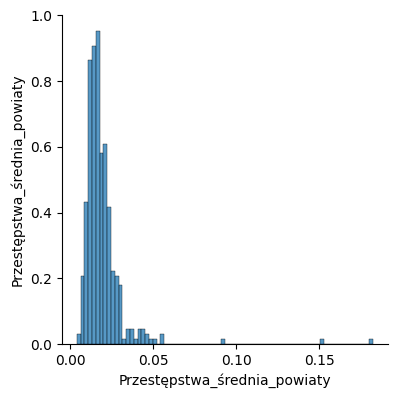

In [124]:
sns.pairplot(pow, height=4)  
plt.show()


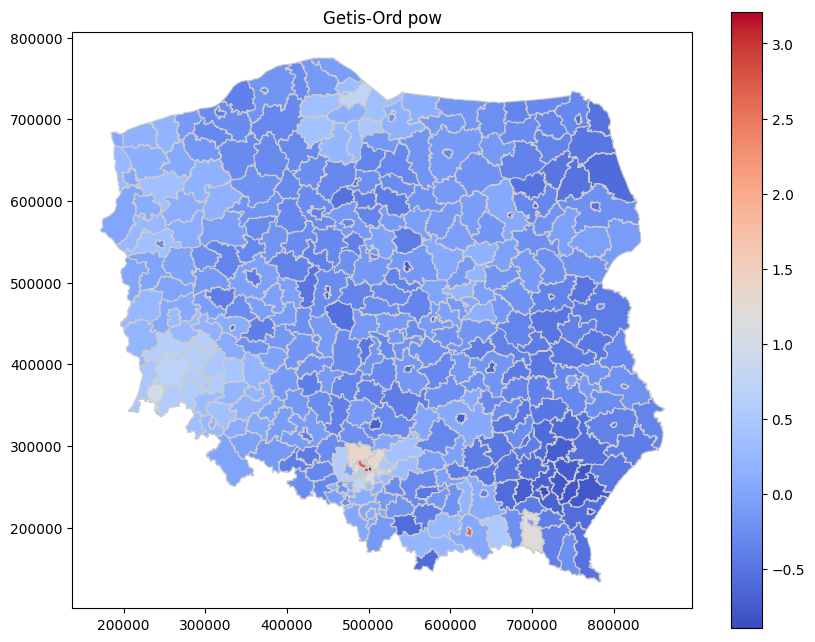

In [125]:
merged_pow['GetisOrd_G_Z'] = g_local_pow.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

Analiza przy użyciu macierzy wag opartych na liczbie najbliższych sąsiadów

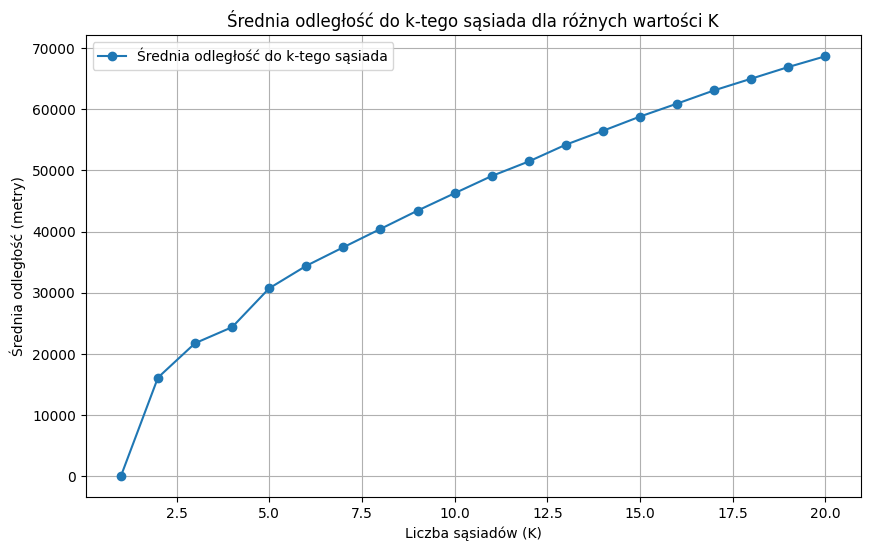

In [144]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Wyciągnięcie współrzędnych centroidów
centroids = merged_pow.geometry.centroid
coords = np.array([[point.x, point.y] for point in centroids])

# Zakres wartości K
k_values = range(1, 21)  

avg_distances = []

for k in k_values:
 
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(coords)
    
  
    distances, indices = knn.kneighbors(coords)
    
   
    avg_distance = np.mean(distances[:, -1])  
    avg_distances.append(avg_distance)


plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_distances, marker='o', label='Średnia odległość do k-tego sąsiada')
plt.xlabel('Liczba sąsiadów (K)')
plt.ylabel('Średnia odległość (metry)')
plt.title('Średnia odległość do k-tego sąsiada dla różnych wartości K')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
from libpysal.weights import KNN
from esda.moran import Moran
import numpy as np


data_column = 'Przestępstwa_średnia_powiaty'
k = 7
w_knn = KNN.from_dataframe(merged_pow, k=k)

y_knn = merged_pow[data_column]

In [128]:
y_knn = merged_pow[data_column]
moran_pow_knn = Moran(y_knn, w_knn)
print("Moran's I:", moran_pow_knn.I)          
print("E(I):", moran_pow_knn.EI)              
print("Var(I):", moran_pow_knn.VI_norm)         
print("Z(I):", moran_pow_knn.z_norm)          
print("p-value:", moran_pow_knn.p_norm)       

Moran's I: 0.1071637985570634
E(I): -0.00228310502283105
Var(I): 0.0005848226609034931
Z(I): 4.525758575433386
p-value: 6.017924970466034e-06


In [129]:
geary_pow_knn = Geary(y_knn, w_knn)
print("Geary's C:", geary_pow_knn.C)           
print("E(C):", geary_pow_knn.EC)               
print("Var(C):", geary_pow_knn.VC_norm)        
print("Z(C):", geary_pow_knn.z_norm)            
print("p-value:", geary_pow_knn.p_norm)        

Geary's C: 1.0292694350269684
E(C): 1.0
Var(C): 0.000678206998631713
Z(C): 1.123914323439486
p-value: 0.13052468713425264


In [130]:
g_pow_knn = G(y_knn, w_knn)
print("G:", g_pow_knn.G)                       
print("E(G):", g_pow_knn.EG)                   
print("Var(G):", g_pow_knn.VG)             
print("Z(G):", g_pow_knn.z_norm)                
print("p-value:", g_pow_knn.p_norm)             

G: 0.017270130870667196
E(G): 0.01598173515981735
Var(G): 5.435151602395383e-08
Z(G): 5.52641429398
p-value: 1.6342090569665402e-08


In [131]:
g_local_pow_knn = G_Local(y_knn, w_knn)
print("Local G* values:", g_local_pow_knn.Zs)

Local G* values: [ 1.35001820e+00  1.49352599e+00  1.41454486e+00  1.52572355e+00
  3.08295080e-01  6.69864754e-02 -2.53246378e-01 -1.75424779e-01
 -5.82619008e-02 -2.17965556e-02  2.11552007e-01  1.46192315e-01
  4.36883057e-02  4.27327187e-01 -3.34905932e-01  2.48956741e-01
  9.16971509e-01  1.32114055e-01  2.75804888e-01  1.97084228e-01
  3.07649862e-01  3.98387699e-02  4.07857757e-02  6.53576964e-01
 -3.11118601e-01 -6.40669860e-01  1.46865736e+00  5.91925005e-02
 -7.30359952e-01  1.47980747e-01 -8.33383256e-02  3.44513345e-01
  5.44242124e-02 -1.24452466e-01 -4.71887850e-02 -5.38816872e-01
 -1.81342091e-01 -1.30879756e-01 -4.88833063e-02 -2.48990073e-01
 -8.71897800e-02  2.63557574e+00  1.64090889e-01  2.38603913e+00
  8.62686443e-01  3.62653693e-01  6.84543161e-02  7.51050246e-01
 -2.22366461e-01 -8.41831435e-02 -1.80535145e-01  3.66394232e-02
  1.59242689e+00 -6.98697746e-04 -1.75066976e-01 -8.69078815e-02
  1.79961840e-01 -3.02100392e-01  8.08962819e-02 -7.56171767e-01
 -1.5680

In [132]:
results_knn = pd.DataFrame({"Statystyka": ["Moran's I", "Geary's C", "Getis-Ord G"],
                            "Wartość": [moran_pow_knn.I, geary_pow_knn.C, g_pow_knn.G],
                            "Wartość oczekiwana": [moran_pow_knn.EI, geary_pow_knn.EC, g_pow_knn.EG],
                            "Wariancja": [moran_pow_knn.VI_norm, geary_pow_knn.VC_norm, g_pow_knn.VG],
                            "Z-score": [moran_pow_knn.z_norm, geary_pow_knn.z_norm, g_pow_knn.z_norm],
                            "p-value": [moran_pow_knn.p_norm, geary_pow_knn.p_norm, g_pow_knn.p_norm]})
print(results_knn)
df_results_knn = pd.DataFrame(results_knn)
output_csv_path_knn2 = "spatial_statistics_summary_knn.csv"
df_results_knn.to_csv(output_csv_path_knn2, index=False)
print(f"Wyniki zapisano do pliku CSV: {output_csv_path_knn}")


    Statystyka   Wartość  Wartość oczekiwana     Wariancja   Z-score  \
0    Moran's I  0.107164           -0.002283  5.848227e-04  4.525759   
1    Geary's C  1.029269            1.000000  6.782070e-04  1.123914   
2  Getis-Ord G  0.017270            0.015982  5.435152e-08  5.526414   

        p-value  
0  6.017925e-06  
1  1.305247e-01  
2  1.634209e-08  
Wyniki zapisano do pliku CSV: spatial_statistics_summary_knn.csv


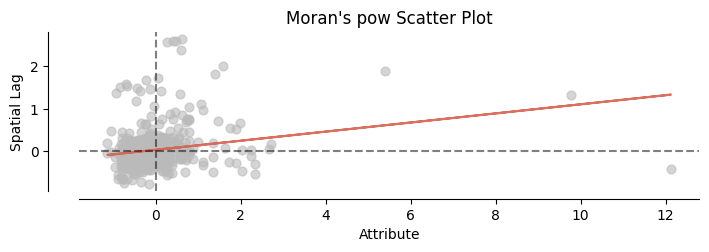

In [133]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow_knn, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

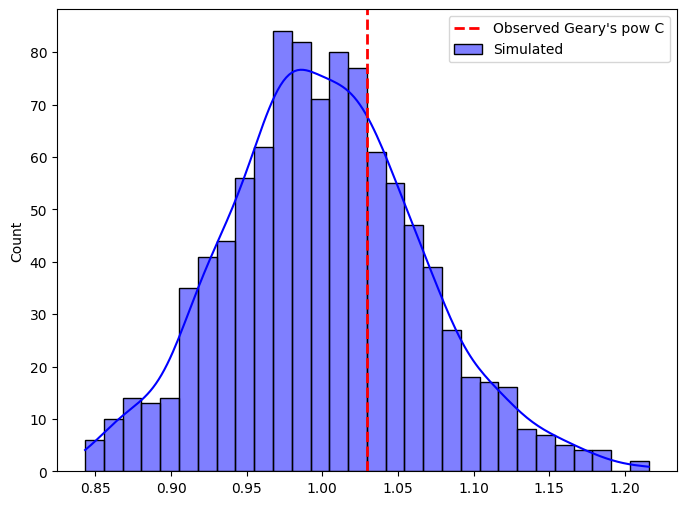

In [134]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow_knn.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow_knn.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

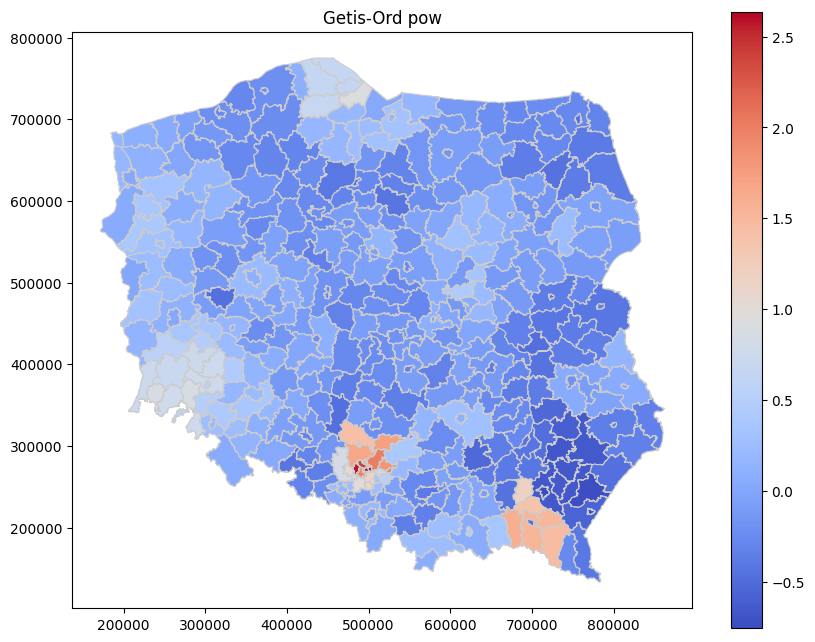

In [135]:
merged_pow['GetisOrd_G_Z'] = g_local_pow_knn.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

#Analiza przy użyciu macierzy wag opartych na odległości 

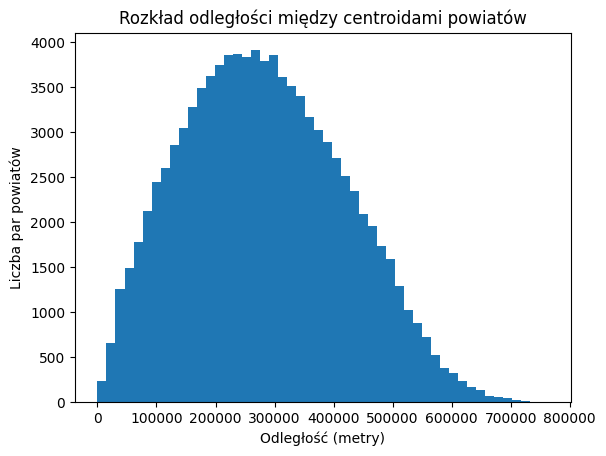

In [136]:
from scipy.spatial.distance import pdist
import numpy as np

# Wyciągnięcie centroidów powiatów
centroids = merged_pow.geometry.centroid

# Obliczenie macierzy odległości między centroidami
coords = np.array([[point.x, point.y] for point in centroids])
distances = pdist(coords)

# Wykres histogramu odległości
plt.hist(distances, bins=50)
plt.xlabel('Odległość (metry)')
plt.ylabel('Liczba par powiatów')
plt.title('Rozkład odległości między centroidami powiatów')
plt.show()


In [ ]:
import numpy as np
from libpysal.weights import DistanceBand

max_dist = merged_pow.geometry.centroid.distance(merged_pow.geometry.centroid.unary_union).max()

threshold_distance = 300000 

w_distance = DistanceBand.from_dataframe(merged_pow, threshold=threshold_distance, binary=True, silence_warnings=True)
w_distance.transform = 'r'

moran_distance = Moran(y, w_distance)
print("Moran's I (distance-based weights):", moran_distance.I)
print("E(I):", moran_distance.EI)
print("Var(I):", moran_distance.VI_norm)
print("Z(I):", moran_distance.z_norm)
print("p-value (normal approximation):", moran_distance.p_norm)


geary_distance = Geary(y, w_distance)
print("Geary's C (distance-based weights):", geary_distance.C)
print("E(C):", geary_distance.EC)
print("Var(C):", geary_distance.VC_norm)
print("Z(C):", geary_distance.z_norm)
print("p-value (normal approximation):", geary_distance.p_norm)

g_distance = G(y, w_distance)
print("Getis-Ord G (distance-based weights):", g_distance.G)
print("E(G):", g_distance.EG)
print("Var(G):", g_distance.VG)
print("Z(G):", g_distance.z_norm)
print("p-value (normal approximation):", g_distance.p_norm)


C:\Users\xjulc\AppData\Local\Temp\ipykernel_18424\1801077525.py:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  max_dist = merged_pow.geometry.centroid.distance(merged_pow.geometry.centroid.unary_union).max()


Moran's I (distance-based weights): 0.005437854297909231
E(I): -0.00228310502283105
Var(I): 8.618248205397388e-06
Z(I): 2.6300364380503054
p-value (normal approximation): 0.00853757167587424
Geary's C (distance-based weights): 0.9584744283237214
E(C): 1.0
Var(C): 7.736199720469879e-05
Z(C): -4.72119331456995
p-value (normal approximation): 1.1723248015145243e-06
Getis-Ord G (distance-based weights): 0.5611145792804787
E(G): 0.5635992968660614
Var(G): 0.000101453990067224
Z(G): -0.24668484394389276
p-value (normal approximation): 0.4025760684613948


#Analiza z wykorzystaniem testów permutacyjnych i różnych macierzy wag

Analiza przy użyciu macierzy wag opartych na liczbie najbliższych sąsiadów

In [139]:
y = merged_pow[data_column]
w = weights.KNN.from_dataframe(merged_pow, k=7) 
moran_pow_knn_perm = Moran(y, w, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_knn_perm.I)
print("E(I):", moran_pow_knn_perm.EI)
print("Var(I):", moran_pow_knn_perm.VI_norm)
print("Z(I):", moran_pow_knn_perm.z_norm)
print("p-value:", moran_pow_knn_perm.p_norm)      

Moran's I (z permutacjami): 0.1071637985570634
E(I): -0.00228310502283105
Var(I): 0.0005848226609034931
Z(I): 4.525758575433386
p-value: 6.017924970466034e-06


In [140]:
y = merged_pow[data_column]
w = weights.KNN.from_dataframe(merged_pow, k=7)
geary_pow_knn_perm = Geary(y, w, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_knn_perm.C)
print("E(C):", geary_pow_knn_perm.EC)
print("Var(C):", geary_pow_knn_perm.VC_norm)
print("Z(C):", geary_pow_knn_perm.z_norm)
print("p-value:", geary_pow_knn_perm.p_norm)        

Geary's C (z permutacjami): 1.0292694350269684
E(C): 1.0
Var(C): 0.000678206998631713
Z(C): 1.123914323439486
p-value: 0.13052468713425264


In [141]:
y = merged_pow[data_column]
w = weights.KNN.from_dataframe(merged_pow, k=7)  

g_pow_knn_perm = G(y, w, permutations=1000)
print("G (z permutacjami):", g_pow_knn_perm.G)
print("E(G):", g_pow_knn_perm.EG)
print("Var(G):", g_pow_knn_perm.VG)
print("Z(G):", g_pow_knn_perm.z_norm)
print("p-value:", g_pow_knn_perm.p_norm)             

G (z permutacjami): 0.017270130870667196
E(G): 0.01598173515981735
Var(G): 5.435151602395383e-08
Z(G): 5.52641429398
p-value: 1.6342090569665402e-08


#Analiza przy użyciu binarnej macierzy sąsiedztwa 

In [ ]:
y = merged_pow[data_column]

moran_pow_queen_perm= Moran(y, w, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_queen_perm.I)
print("E(I):", moran_pow_queen_perm.EI)
print("Var(I):", moran_pow_queen_perm.VI_norm)
print("Z(I):", moran_pow_queen_perm.z_norm)
print("p-value:", moran_pow_queen_perm.p_norm)       

Moran's I (z permutacjami): 0.09157245301929501
E(I): -0.00228310502283105
Var(I): 0.0008082214880628686
Z(I): 3.301374556327043
p-value: 0.0009621234742455478


In [ ]:
geary_pow_queen_perm = Geary(y, w, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_queen_perm.C)
print("E(C):", geary_pow_queen_perm.EC)
print("Var(C):", geary_pow_queen_perm.VC_norm)
print("Z(C):", geary_pow_queen_perm.z_norm)
print("p-value:", geary_pow_queen_perm.p_norm)       

Geary's C (z permutacjami): 1.0041331430542757
E(C): 1.0
Var(C): 0.0009355087500489409
Z(C): 0.13513147279727755
p-value: 0.44625396334953404


In [ ]:
g_pow_queen_perm = G(y, w, permutations=1000)

print("G (z permutacjami):", g_pow_queen_perm.G)
print("E(G):", g_pow_queen_perm.EG)
print("Var(G):", g_pow_queen_perm.VG)
print("Z(G):", g_pow_queen_perm.z_norm)
print("p-value:", g_pow_queen_perm.p_norm)         

G (z permutacjami): 0.012328151042122822
E(G): 0.01141552511415525
Var(G): 3.809968394919393e-08
Z(G): 4.675543657226979
p-value: 1.4658794843525058e-06


Analiza przy użyciu macierzy wag opartych na odległości

In [ ]:
y=merged_pow[data_column]
threshold_distance = 30000  # w metrach (30 km)
w_distance = DistanceBand.from_dataframe(
    merged_pow, 
    threshold=threshold_distance, 
    binary=True, 
    silence_warnings=True
)
w_distance.transform = 'r'
moran_pow_distance_perm = Moran(y, w_distance, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_distance_perm.I)
print("E(I):", moran_pow_distance_perm.EI)
print("Var(I):", moran_pow_distance_perm.VI_norm)
print("Z(I):", moran_pow_distance_perm.z_norm)
print("p-value:", moran_pow_distance_perm.p_norm)


Moran's I (z permutacjami): 0.1029144619248174
E(I): -0.00228310502283105
Var(I): 0.0021316575522232037
Z(I): 2.2784892127870533
p-value: 0.022697446479401157


In [ ]:
geary_pow_distance_perm = Geary(y, w_distance, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_distance_perm.C)
print("E(C):", geary_pow_distance_perm.EC)
print("Var(C):", geary_pow_distance_perm.VC_norm)
print("Z(C):", geary_pow_distance_perm.z_norm)
print("p-value:", geary_pow_distance_perm.p_norm)

Geary's C (z permutacjami): 1.151793421921952
E(C): 1.0
Var(C): 0.003155597517507135
Z(C): 2.7021667681928028
p-value: 0.0034444599907870266


In [ ]:
getis_pow_distance_perm = G(y, w_distance, permutations=1000)
print("Getis-Ord G (z permutacjami):", getis_pow_distance_perm.G)
print("E(G):", getis_pow_distance_perm.EG)
print("Var(G):", getis_pow_distance_perm.VG)
print("Z(G):", getis_pow_distance_perm.z_norm)
print("p-value:", getis_pow_distance_perm.p_norm)

Getis-Ord G (z permutacjami): 0.011776224398629109
E(G): 0.007697028322983951
Var(G): 2.971930179328415e-07
Z(G): 7.482647388686264
p-value: 3.6415315207705135e-14
